In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Train_Acc_Before = []
Test_Acc_Before = []
Train_Acc_After = []
Test_Acc_After = []
Models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']

In [3]:
data = pd.read_csv("C:/Users/Lenovo/Desktop/IIIT B NOTES/ML/Assignment1/football.csv")

In [4]:
data.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,contribution_type
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,73.0,...,20,35,24,6,11,15,14,8,NaN,1
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,21.0,...,35,42,19,15,6,12,8,10,NaN,1
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,11.0,...,24,32,24,7,11,15,14,11,NaN,1
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,73.0,...,35,32,29,9,9,15,15,11,NaN,1
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,10.0,...,68,65,53,15,13,5,10,13,NaN,1


In [5]:
data.size

512952

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    7772 non-null   int64  
 1   short_name                   7772 non-null   object 
 2   overall                      7772 non-null   int64  
 3   potential                    7772 non-null   int64  
 4   value_eur                    7706 non-null   float64
 5   wage_eur                     7711 non-null   float64
 6   age                          7772 non-null   int64  
 7   height_cm                    7772 non-null   int64  
 8   weight_kg                    7772 non-null   int64  
 9   club_team_id                 7711 non-null   float64
 10  club_name                    7711 non-null   object 
 11  league_name                  7711 non-null   object 
 12  league_level                 7711 non-null   float64
 13  club_jersey_number

In [7]:
col = data.columns[data.isna().any()].tolist()
col = col + ["sofifa_id","short_name" ]

In [8]:
x = data.drop(col,axis=1)

In [9]:
x.head()

,overall,potential,age,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,contribution_type
0,93,93,34,170,72,Left,4,4,5,Medium/Low,...,96,20,35,24,6,11,15,14,8,1
1,92,92,32,185,81,Right,4,4,5,High/Medium,...,88,35,42,19,15,6,12,8,10,1
2,91,91,36,187,83,Right,4,5,5,High/Low,...,95,24,32,24,7,11,15,14,11,1
3,91,91,29,175,68,Right,5,5,5,High/Medium,...,93,35,32,29,9,9,15,15,11,1
4,91,91,30,181,70,Right,5,4,4,High/High,...,89,68,65,53,15,13,5,10,13,1


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7772 entries, 0 to 7771
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   overall                      7772 non-null   int64 
 1   potential                    7772 non-null   int64 
 2   age                          7772 non-null   int64 
 3   height_cm                    7772 non-null   int64 
 4   weight_kg                    7772 non-null   int64 
 5   preferred_foot               7772 non-null   object
 6   weak_foot                    7772 non-null   int64 
 7   skill_moves                  7772 non-null   int64 
 8   international_reputation     7772 non-null   int64 
 9   work_rate                    7772 non-null   object
 10  body_type                    7772 non-null   object
 11  attacking_crossing           7772 non-null   int64 
 12  attacking_finishing          7772 non-null   int64 
 13  attacking_heading_accuracy   7772

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
categorical_features = ["preferred_foot","work_rate","body_type" ]
for each in categorical_features:
    x[each] = encoder.fit_transform(x[each])

In [12]:
from sklearn.linear_model import LinearRegression
X = x.drop('overall', axis=1)
y = x['overall']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
linreg_model = LinearRegression()
linreg_model.fit(X_train,y_train)
train_score = linreg_model.score(X_train, y_train)
print(train_score)
test_score = linreg_model.score(X_test, y_test)
print(test_score)
Train_Acc_Before.append(train_score)
Test_Acc_Before.append(test_score)
y_pred = linreg_model.predict(X_test)

0.9308764924525672
0.9321038118399142


In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [17]:
print("MAE for this model: ",mean_absolute_error(y_test,y_pred))
print("MSE for this model: ",mean_squared_error(y_test,y_pred))
print("R2 SCORE for this model  : ",r2_score(y_test,y_pred))

MAE for this model:  1.2180293800319302
MSE for this model:  2.552572472468757
R2 SCORE for this model  :  0.9321038118399142


In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [19]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
for col, coef in zip(X_train.columns, lasso_model.coef_):
    print("Lasso regression model coefficient for {} is {:.2f}".format(col, coef))
train_score = lasso_model.score(X_train, y_train)
print(train_score)
test_score = lasso_model.score(X_test, y_test)
print(test_score)

Train_Acc_Before.append(train_score)
Test_Acc_Before.append(test_score)

Lasso regression model coefficient for potential is 0.51
Lasso regression model coefficient for age is 0.38
Lasso regression model coefficient for height_cm is -0.01
Lasso regression model coefficient for weight_kg is 0.01
Lasso regression model coefficient for preferred_foot is -0.00
Lasso regression model coefficient for weak_foot is -0.00
Lasso regression model coefficient for skill_moves is 0.00
Lasso regression model coefficient for international_reputation is 0.00
Lasso regression model coefficient for work_rate is -0.00
Lasso regression model coefficient for body_type is 0.04
Lasso regression model coefficient for attacking_crossing is 0.03
Lasso regression model coefficient for attacking_finishing is 0.01
Lasso regression model coefficient for attacking_heading_accuracy is 0.04
Lasso regression model coefficient for attacking_short_passing is 0.05
Lasso regression model coefficient for attacking_volleys is -0.00
Lasso regression model coefficient for skill_dribbling is 0.02
Las

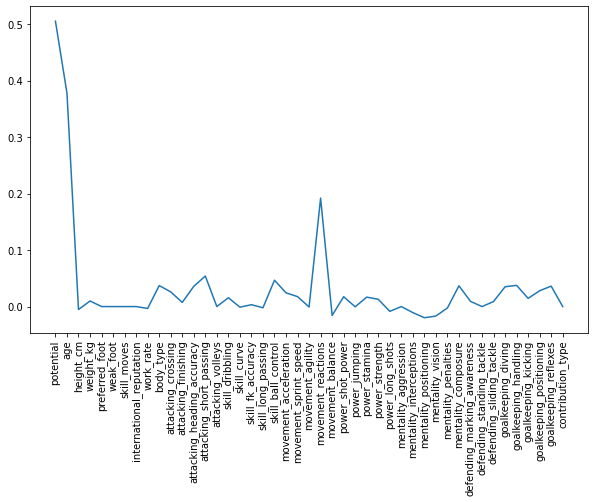

In [20]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(X_train.columns)), lasso_model.coef_)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
plt.show()

In [21]:
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
for col, coef in zip(X_train.columns, ridge_model.coef_):
    print("Ridge regression model coefficient for {} is {:.2f}".format(col, coef))
train_score = ridge_model.score(X_train, y_train)
print(train_score)
test_score = ridge_model.score(X_test, y_test)
print(test_score)

Train_Acc_Before.append(train_score)
Test_Acc_Before.append(test_score)

Ridge regression model coefficient for potential is 0.49
Ridge regression model coefficient for age is 0.37
Ridge regression model coefficient for height_cm is -0.02
Ridge regression model coefficient for weight_kg is 0.01
Ridge regression model coefficient for preferred_foot is -0.08
Ridge regression model coefficient for weak_foot is -0.04
Ridge regression model coefficient for skill_moves is 0.38
Ridge regression model coefficient for international_reputation is 0.35
Ridge regression model coefficient for work_rate is -0.01
Ridge regression model coefficient for body_type is 0.05
Ridge regression model coefficient for attacking_crossing is 0.02
Ridge regression model coefficient for attacking_finishing is 0.01
Ridge regression model coefficient for attacking_heading_accuracy is 0.04
Ridge regression model coefficient for attacking_short_passing is 0.06
Ridge regression model coefficient for attacking_volleys is -0.00
Ridge regression model coefficient for skill_dribbling is 0.02
Rid

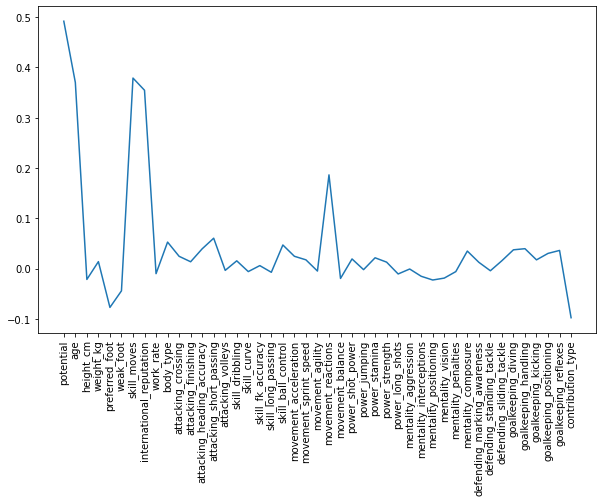

In [22]:
plt.figure(figsize = (10, 6))
plt.plot(range(len(X_train.columns)), ridge_model.coef_)
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation = 90)
plt.show()

In [23]:
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

train_score = linreg_model.score(X_train, y_train)
print(train_score)
test_score = linreg_model.score(X_test, y_test)
print(test_score)

Train_Acc_After.append(train_score)
Test_Acc_After.append(test_score)

0.9308764924525672
0.9321038118399142


In [24]:
import numpy as np
alpha_params = np.logspace(-5, 0, 10)
alpha_params

array([1.00000000e-05, 3.59381366e-05, 1.29154967e-04, 4.64158883e-04,
       1.66810054e-03, 5.99484250e-03, 2.15443469e-02, 7.74263683e-02,
       2.78255940e-01, 1.00000000e+00])

In [25]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")
ridge_model_scores = []
ridge_model = Ridge(normalize = True)
for alpha in alpha_params:
    ridge_model.alpha = alpha
    val = np.mean(cross_val_score(ridge_model, X, y, cv = 10))
    ridge_model_scores.append(val)

In [26]:
lasso_model_scores = []
lasso_model = Lasso(normalize = True)
for alpha in alpha_params:
    lasso_model.alpha = alpha
    val = np.mean(cross_val_score(lasso_model, X, y, cv = 10))
    lasso_model_scores.append(val)

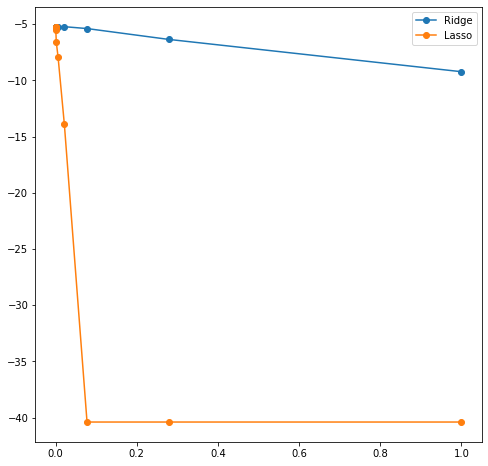

In [27]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_params, ridge_model_scores, marker = 'o', label = "Ridge")
plt.plot(alpha_params, lasso_model_scores, marker = 'o', label = "Lasso")
plt.legend()
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': (np.logspace(-8, 8, 100))} 
lasso = Lasso(normalize=True)
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)
print(lasso_model.best_score_)
lasso_param = lasso_model.best_params_['alpha']

{'alpha': 3.853528593710536e-06}
0.9293002212081101


In [29]:
lasso = Lasso(alpha =  lasso_param, normalize = True)
lasso.fit(X_train, y_train)

train_score = lasso.score(X_train, y_train)
print(train_score)
test_score = lasso.score(X_test, y_test)
print(test_score)

Train_Acc_After.append(train_score)
Test_Acc_After.append(test_score)

0.9308756138315593
0.9320939713532412


In [30]:
params = {'alpha': (np.logspace(-12, 12, 100))}
ridge = Ridge(normalize=True)
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(X_train, y_train)
print(ridge_model.best_params_)
print(ridge_model.best_score_)
ridge_param = ridge_model.best_params_['alpha']

{'alpha': 0.0028480358684358047}
0.9293139225542678


In [31]:
ridge = Ridge(alpha = ridge_param , normalize = True)
ridge.fit(X_train, y_train)

train_score = ridge.score(X_train, y_train)
print(train_score)
test_score = ridge.score(X_test, y_test)
print(test_score)

Train_Acc_After.append(train_score)
Test_Acc_After.append(test_score)

0.9308634472906241
0.9320841150612657


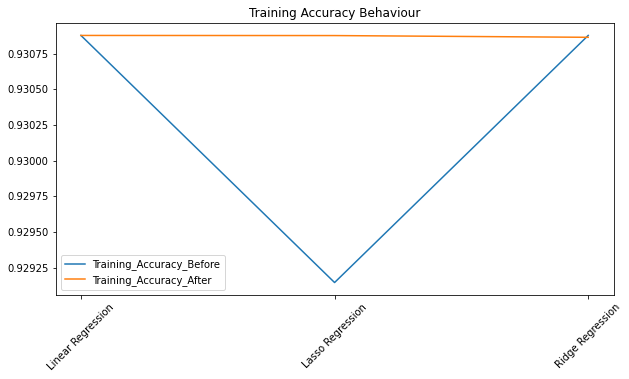

In [32]:
plt.figure(figsize=(10,5))
plt.plot(Train_Acc_Before, label = 'Training_Accuracy_Before')
plt.plot(Train_Acc_After, label = 'Training_Accuracy_After')
plt.xticks(range(len(Models)), Models, Rotation = 45)
plt.title('Training Accuracy Behaviour')
plt.legend()
plt.show()

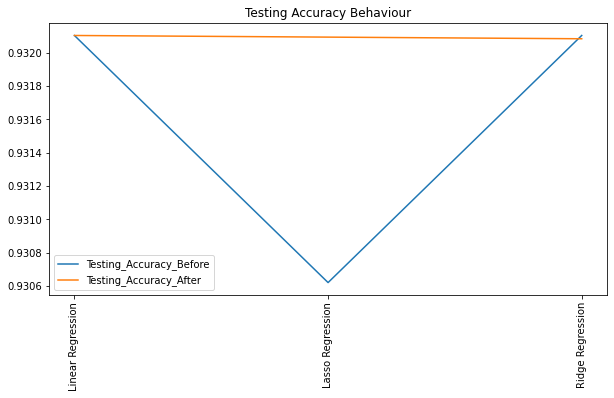

In [33]:
plt.figure(figsize=(10,5))
plt.plot(Test_Acc_Before, label = 'Testing_Accuracy_Before')
plt.plot(Test_Acc_After, label = 'Testing_Accuracy_After')
plt.xticks(range(len(Models)), Models, Rotation = 90)
plt.title('Testing Accuracy Behaviour')
plt.legend()
plt.show()